# Proyecto Predicción de Emisiones de CO2 de México

El presente proyecto pretende realizar una predicción de las emisiones de dioxido de carbono para México, haciendo uso de los modelos de Machine Learning. A partir de los datos de emisiones de dioxido de carbono (CO2), generados por diferentes sectores como la producción, energetica, manufactura, transporte y edificaciones.

Los Datos que se trabajaran se tomaron de la plataforma kaggle, estos tienen una actualizacion de hace 5 meses aproximadamente, aqui se encontro una colección de indicadores ambientales y datos de emisiones de varios países del mundo. Para la realizacion de la predicion de las emisiones de dioxido de carbono se tomaron los datos para Mexico, y se aplicaran los modelos (PONER MODELOS ML A USAR)con Pandas, esto con el fin de obtener la prediccion de futuras emisiones.

##Integrantes:

*   Akari Yessenia Gutierrez Esquivel
*   Ana Karen Dominguez
*   Brenda Carmen Ramirez Reyes
*   De la Cruz Rodriguez Julisa Jenifer
*   Marcela Kineret Rivera Santibañez
*   Paula Ximena Anzola Agudelo
*   Rocio Karime Aguirre Hernandez
*   Diana Laura Garza de la Riva





In [ ]:
import pandas as pd
import numpy as np
import re

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew, kurtosis
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import plotly.express as px


In [ ]:
#Carga de DataSet
path_file="https://raw.githubusercontent.com/RiquelmeDom/bedu_ml_data_set/main/World_CO2_Emission_Data.csv"
df= pd.read_csv(path_file)
df.head()



,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Afghanistan,AFG,Adjusted savings: carbon dioxide damage (% of ...,NY.ADJ.DCO2.GN.ZS,..,..,..,..,..,..,...,1.36338448111679,1.28490840585691,1.44307895621429,1.44782682979766,1.4533391998403,1.59805470965195,1.55643923193288,1.40187835275711,..,..
1,Afghanistan,AFG,Adjusted savings: carbon dioxide damage (curre...,NY.ADJ.DCO2.CD,..,..,..,..,..,..,...,275631280.588653,263338827.184962,278618004.122999,264910281.973801,276138145.017514,291498572.368998,297253521.47533,284648920.796122,..,..
2,Afghanistan,AFG,Agricultural methane emissions (thousand metri...,EN.ATM.METH.AG.KT.CE,..,..,..,..,..,..,...,11284.75,11476.1975,10834.435,10617.2325,10314.9575,10549.4125,10222.785,10679.11,..,..
3,Afghanistan,AFG,Agricultural nitrous oxide emissions (thousand...,EN.ATM.NOXE.AG.KT.CE,..,..,..,..,..,..,...,4440.1106,4744.2494,4702.3804,4680.2688,4892.1766,4289.9782,4258.4498,4465.977,..,..
4,Afghanistan,AFG,CO2 emissions (kg per 2015 US$ of GDP),EN.ATM.CO2E.KD.GD,..,..,..,..,..,..,...,0.489964677117366,0.470845775464021,0.50292618070602,0.454516147902539,0.477468930733004,0.516563214552466,0.50918979595916,0.404094523787425,..,..


# 1. Limpieza de Datos

Se procedio a realizar la limpieza de los datos, eliminando de nuestro dataset los valores Nan, delimitando el rango de años que queremos estudiar, y tomando solo los datos para nuestro interes que en este caso seran los del pais Mexico.

In [ ]:
nan_rows = df.isna().sum(axis=1)
nan_rows

0        0
1        0
2        0
3        0
4        0
        ..
8246    67
8247    67
8248    67
8249    66
8250    66
Length: 8251, dtype: int64

In [ ]:
data_filtered = df.drop(df[nan_rows > 30].index)

Se procede a renombrar las columnas de nuestro dataset con el fin de obtener una mejor lectura de los datos.

In [ ]:
#rename columns
column_name_mapping = {
	'Country Name': 'country',
	'Country Code': 'code_country',
	'Series Name': 'variable',
  'Series Code': 'code_var',
  '1960 [YR1960]': '1960',
	'1961 [YR1961]': '1961',
	'1962 [YR1962]': '1962',
  '1963 [YR1963]': '1963',
	'1964 [YR1964]': '1964',
	'1965 [YR1965]': '1965',
  '1966 [YR1966]': '1966',
	'1967 [YR1967]': '1967',
  '1968 [YR1968]': '1968',
	'1969 [YR1969]': '1969',
	'1970 [YR1970]': '1970',
  '1971 [YR1971]': '1971',
	'1972 [YR1972]': '1972',
  '1973 [YR1973]': '1973',
	'1974 [YR1974]': '1974',
	'1975 [YR1975]': '1975',
  '1976 [YR1976]': '1976',
	'1977 [YR1977]': '1977',
  '1978 [YR1978]': '1978',
	'1979 [YR1979]': '1979',
	'1980 [YR1980]': '1980',
  '1981 [YR1981]': '1981',
	'1982 [YR1982]': '1982',
  '1983 [YR1983]': '1983',
	'1984 [YR1984]': '1984',
	'1985 [YR1985]': '1985',
  '1986 [YR1986]': '1986',
	'1987 [YR1987]': '1987',
  '1988 [YR1988]': '1988',
	'1989 [YR1989]': '1989',
	'1990 [YR1990]': '1990',
  '1991 [YR1991]': '1991',
	'1992 [YR1992]': '1992',
  '1993 [YR1993]': '1993',
	'1994 [YR1994]': '1994',
	'1995 [YR1995]': '1995',
  '1996 [YR1996]': '1996',
	'1997 [YR1997]': '1997',
  '1998 [YR1998]': '1998',
	'1999 [YR1999]': '1999',
	'2000 [YR2000]': '2000',
  '2001 [YR2001]': '2001',
	'2002 [YR2002]': '2002',
  '2003 [YR2003]': '2003',
	'2004 [YR2004]': '2004',
	'2005 [YR2005]': '2005',
  '2006 [YR2006]': '2006',
	'2007 [YR2007]': '2007',
  '2008 [YR2008]': '2008',
	'2009 [YR2009]': '2009',
	'2010 [YR2010]': '2010',
  '2011 [YR2011]': '2011',
	'2012 [YR2012]': '2012',
  '2013 [YR2013]': '2013',
	'2014 [YR2014]': '2014',
	'2015 [YR2015]': '2015',
  '2016 [YR2016]': '2016',
	'2017 [YR2017]': '2017',
  '2018 [YR2018]': '2018',
	'2019 [YR2019]': '2019',
	'2020 [YR2020]': '2020',
  '2021 [YR2021]': '2021',
	'2022 [YR2022]': '2022',
  '2023 [YR2023]': '2023',
}

In [ ]:
new_data = data_filtered.rename(columns=column_name_mapping)

In [ ]:
# Reemplazar ".." con 0 en todo el DataFrame
new_data.replace('..', 0, inplace=True)

In [ ]:
new_data.reset_index(drop=True).tail()

my_data = new_data.loc[:, ['country', 'code_country', 'variable', 'code_var'] + [str(año) for año in range(1990, 2022)]]
my_data

#Filter rows
clean_data = my_data.drop(my_data.index[8149:8246])

Filtramos los años en que queremos tener en cuenta, para este caso sera desde 1990 a 2022, y tomamos solo las variables que seran de nuestro interes, para el caso de estudio, las emisiones de dioxido de carbono generados por actividades como industria, domestico, no domestico, combustion entro otras.

In [ ]:
# Lista de columnas de años a convertir
rows_convert = [str(año) for año in range(1990, 2022)]

# Convertir las columnas seleccionadas a tipo de dato float
clean_data[rows_convert] = clean_data[rows_convert].apply(pd.to_numeric, errors='coerce')

In [ ]:
# Filtrar las variables de interés
variables_interest = ['CO2 intensity (kg per kg of oil equivalent energy use)',
                      'CO2 emissions from transport (% of total fuel combustion)',
                      'CO2 emissions from solid fuel consumption (% of total)',
                      'CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)',
                      'CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)',
                      'CO2 emissions from manufacturing industries and construction (% of total fuel combustion)',
                      'CO2 emissions from liquid fuel consumption (% of total)',
                      'CO2 emissions from gaseous fuel consumption (% of total)',
                      'CO2 emissions from electricity and heat production, total (% of total fuel combustion)',
                      'CO2 emissions (metric tons per capita)',
                      'CO2 emissions (kt)',
                      'Total greenhouse gas emissions (kt of CO2 equivalent)',
                      'Adjusted savings: carbon dioxide damage (current US$)',
                      'Adjusted savings: carbon dioxide damage (% of GNI)']
df = clean_data[clean_data['variable'].isin(variables_interest)]
df = df.round(2)
df = df.reset_index(drop=True)

Tomamos solo los datos para Mexico, y llenamos los datos que reemplazamos los Nan con 0, por el promedio para esa categoria.

In [ ]:
mexico_data = df[df['country'] == 'Mexico']
mexico_data.round(2)

variables_of_interest = [
    'CO2 emissions from solid fuel consumption (% of total)',
    'CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)',
    'CO2 emissions from transport (% of total fuel combustion)',
    'CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)',
    'CO2 emissions from manufacturing industries and construction (% of total fuel combustion)',
    'CO2 emissions from liquid fuel consumption (% of total)',
    'CO2 emissions from gaseous fuel consumption (% of total)',
    'CO2 emissions from electricity and heat production, total (% of total fuel combustion)',
    'CO2 emissions (kt)',
    'Total greenhouse gas emissions (kt of CO2 equivalent)'
]

filtered_df = mexico_data[mexico_data['variable'].isin(variables_of_interest)]
filtered_df.head()

,country,code_country,variable,code_var,1990,1991,1992,1993,1994,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1780,Mexico,MEX,CO2 emissions (kt),EN.ATM.CO2E.KT,269575.40,287995.80,291682.50,300667.50,326504.80,306842.10,...,486454.20,475737.50,462240.10,471632.60,476394.60,474498.5,444898.4,451828.8,383131.4,0.0
1782,Mexico,MEX,CO2 emissions from electricity and heat produc...,EN.CO2.ETOT.ZS,36.68,38.74,38.69,39.98,42.17,41.84,...,46.01,44.65,44.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0
1783,Mexico,MEX,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,19.79,19.33,19.21,18.32,17.47,18.59,...,28.26,30.31,30.24,31.34,31.63,0.0,0.0,0.0,0.0,0.0
1784,Mexico,MEX,CO2 emissions from liquid fuel consumption (% ...,EN.ATM.CO2E.LF.ZS,88.10,86.24,85.91,83.10,79.23,77.46,...,60.41,59.15,58.80,54.82,52.71,0.0,0.0,0.0,0.0,0.0
1785,Mexico,MEX,CO2 emissions from manufacturing industries an...,EN.CO2.MANF.ZS,20.73,18.92,18.61,17.52,16.46,16.93,...,13.44,14.67,13.45,0.00,0.00,0.0,0.0,0.0,0.0,0.0


In [ ]:
df = pd.DataFrame(filtered_df)

In [ ]:
df['promedio'] = df.loc[:, '1990':'2021'].apply(lambda row: row[row != 0].mean(), axis=1)


In [ ]:
df.loc[:, '1990':'2021'] = df.loc[:, '1990':'2021'].apply(lambda row: row.replace(0, row[row != 0].mean()), axis=1)

df.round(2)

,country,code_country,variable,code_var,1990,1991,1992,1993,1994,1995,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,promedio
1780,Mexico,MEX,CO2 emissions (kt),EN.ATM.CO2E.KT,269575.40,287995.80,291682.50,300667.50,326504.80,306842.10,...,475737.50,462240.10,471632.60,476394.60,474498.50,444898.40,451828.80,383131.40,401457.83,401457.83
1782,Mexico,MEX,CO2 emissions from electricity and heat produc...,EN.CO2.ETOT.ZS,36.68,38.74,38.69,39.98,42.17,41.84,...,44.65,44.07,43.92,43.92,43.92,43.92,43.92,43.92,43.92,43.92
1783,Mexico,MEX,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,19.79,19.33,19.21,18.32,17.47,18.59,...,30.31,30.24,31.34,31.63,23.69,23.69,23.69,23.69,23.69,23.69
1784,Mexico,MEX,CO2 emissions from liquid fuel consumption (% ...,EN.ATM.CO2E.LF.ZS,88.10,86.24,85.91,83.10,79.23,77.46,...,59.15,58.80,54.82,52.71,68.32,68.32,68.32,68.32,68.32,68.32
1785,Mexico,MEX,CO2 emissions from manufacturing industries an...,EN.CO2.MANF.ZS,20.73,18.92,18.61,17.52,16.46,16.93,...,14.67,13.45,15.52,15.52,15.52,15.52,15.52,15.52,15.52,15.52
1786,Mexico,MEX,"CO2 emissions from other sectors, excluding re...",EN.CO2.OTHX.ZS,2.00,1.93,1.93,1.88,1.64,1.80,...,1.99,2.07,1.88,1.88,1.88,1.88,1.88,1.88,1.88,1.88
1787,Mexico,MEX,CO2 emissions from residential buildings and c...,EN.CO2.BLDG.ZS,8.09,7.92,8.51,8.49,8.23,8.74,...,5.08,5.32,6.78,6.78,6.78,6.78,6.78,6.78,6.78,6.78
1788,Mexico,MEX,CO2 emissions from solid fuel consumption (% o...,EN.ATM.CO2E.SF.ZS,5.94,5.43,5.11,6.06,6.22,7.27,...,10.65,10.69,9.34,9.94,8.58,8.58,8.58,8.58,8.58,8.58
1789,Mexico,MEX,CO2 emissions from transport (% of total fuel ...,EN.CO2.TRAN.ZS,32.50,32.50,32.26,32.13,31.50,30.69,...,33.61,35.09,31.90,31.90,31.90,31.90,31.90,31.90,31.90,31.90
1791,Mexico,MEX,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,409784.54,429088.34,432074.18,449487.97,476196.88,455462.27,...,663759.57,659021.45,674268.12,682791.41,679728.33,651037.05,659740.41,592321.17,576395.57,576395.57


In [ ]:
df.shape

(10, 37)


# 2.Separación, validación y evaluación para algoritmos de ML

Como se ha observado estamos usando un dataframe que contiene las Actividades que emiten CO2 y los años de evaluacion, estos datos los tenemos en porcentaje de CO2. Para este caso tomaremos:

- **Variables Independientes (Entrada):** Actividades que emiten *CO2*, ubicadas en nuestar columna de variables.

- **Variables dependientes (Salidas):** *Emisiones de CO2 por año*, que representan el porcentaje de emisiones de CO2 para cada actividad en un año específico, y que para efectos de nuestro proyecto seran las variables que deseamos predecir.

Por la cantidad de datos que el dataframe contiene, consideramos que la particion debe destinar la mayor parte de los datos al entrenamiento de los algoritmos. El resto se usara para su evaluación.

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

Creamos un dataset 'data' que contenga solo las columnas con los años y sus respectivos datos

In [ ]:
data = df
data = data.drop(columns=['country', 'code_country', 'variable', 'code_var', 'promedio'])
data

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1780,269575.40,287995.80,291682.50,300667.50,326504.80,306842.10,322699.10,342478.40,365142.40,355178.30,...,486454.20,475737.50,462240.10,471632.6000,476394.6000,474498.500000,444898.400000,451828.800000,383131.400000,401457.825806
1782,36.68,38.74,38.69,39.98,42.17,41.84,41.77,43.80,45.97,45.47,...,46.01,44.65,44.07,43.9240,43.9240,43.924000,43.924000,43.924000,43.924000,43.924000
1783,19.79,19.33,19.21,18.32,17.47,18.59,19.26,18.85,19.07,19.38,...,28.26,30.31,30.24,31.3400,31.6300,23.686296,23.686296,23.686296,23.686296,23.686296
1784,88.10,86.24,85.91,83.10,79.23,77.46,72.69,72.28,70.89,75.35,...,60.41,59.15,58.80,54.8200,52.7100,68.323704,68.323704,68.323704,68.323704,68.323704
1785,20.73,18.92,18.61,17.52,16.46,16.93,18.00,17.01,16.32,15.44,...,13.44,14.67,13.45,15.5164,15.5164,15.516400,15.516400,15.516400,15.516400,15.516400
1786,2.00,1.93,1.93,1.88,1.64,1.80,1.85,1.86,1.74,1.97,...,2.06,1.99,2.07,1.8812,1.8812,1.881200,1.881200,1.881200,1.881200,1.881200
1787,8.09,7.92,8.51,8.49,8.23,8.74,8.28,7.69,7.50,7.03,...,5.18,5.08,5.32,6.7752,6.7752,6.775200,6.775200,6.775200,6.775200,6.775200
1788,5.94,5.43,5.11,6.06,6.22,7.27,7.73,7.33,7.05,7.22,...,10.25,10.65,10.69,9.3400,9.9400,8.578148,8.578148,8.578148,8.578148,8.578148
1789,32.50,32.50,32.26,32.13,31.50,30.69,30.10,29.63,28.47,30.10,...,33.32,33.61,35.09,31.9032,31.9032,31.903200,31.903200,31.903200,31.903200,31.903200
1791,409784.54,429088.34,432074.18,449487.97,476196.88,455462.27,475266.31,498988.95,523900.11,512595.16,...,678448.86,663759.57,659021.45,674268.1200,682791.4100,679728.330000,651037.050000,659740.410000,592321.170000,576395.571290


In [ ]:
#Algoritmo k-fold
K = 10
random_seed = None
aleatorio = False
kfold = KFold(n_splits=K, shuffle=aleatorio, random_state=random_seed)

ciclo = 1
for indices_train, indices_test in kfold.split(data.columns):
  ##separacion
    print("Ciclo: "+str(ciclo))
    train_dataset = data[data.columns[indices_train]]
    print("\t datos para entrenamiento:"+str(train_dataset.columns.tolist()))
    test_dataset = data[data.columns[indices_test]]
    print("\t datos para prueba:"+str(test_dataset.columns.tolist()))

    ##modelo

    ##evaluacion

    ciclo+=1

Ciclo: 1
	 datos para entrenamiento:['1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
	 datos para prueba:['1990', '1991', '1992', '1993']
Ciclo: 2
	 datos para entrenamiento:['1990', '1991', '1992', '1993', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
	 datos para prueba:['1994', '1995', '1996', '1997']
Ciclo: 3
	 datos para entrenamiento:['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
	 datos para prueba:['1998', '1999', '2000']
Ciclo: 4
	 datos para entrenamiento:['1990', '1991', '1992

In [ ]:
##algoritmo Leave One Out
K = data.shape[1]
random_seed = None
aleatorio = False
kfold = KFold(n_splits=K, shuffle=aleatorio, random_state=random_seed)

ciclo = 1
for indices_train, indices_test in kfold.split(data.columns):
  ##separacion
    print("Ciclo: "+str(ciclo))
    train_dataset = data[data.columns[indices_train]]
    print("\t datos para entrenamiento:"+str(train_dataset.columns.tolist()))
    test_dataset = data[data.columns[indices_test]]
    print("\t datos para prueba:"+str(test_dataset.columns.tolist()))

    ##modelo

    ##evaluacion

    ciclo+=1

Ciclo: 1
	 datos para entrenamiento:['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
	 datos para prueba:['1990']
Ciclo: 2
	 datos para entrenamiento:['1990', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
	 datos para prueba:['1991']
Ciclo: 3
	 datos para entrenamiento:['1990', '1991', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
	 datos para prueba:['1992']
Ciclo: 4
	 datos para entrenamiento:['1990', '1991', '1992


Predecir las emisiones de CO2 es un problema de **aprendizaje supervisado** porque normalmente se tienen datos históricos con las **emisiones de CO2 como variable objetivo**. La regresión lineal es un algoritmo de aprendizaje supervisado diseñado para tales escenarios.

K-means, es un algoritmo de agrupamiento no supervisado.
Se utiliza cuando desea agrupar puntos de datos en grupos según la similitud, pero no hace predicciones sobre una variable objetivo específica.




In [ ]:
#Selección del valor de K:
#Se puede utilizar el método del codo para determinar el número óptimo de clusters.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#df = data.dropna(subset=['country', 'code_country', 'variable', 'code_var', 'promedio'])
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data.iloc[0])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss)
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

#Aplicación del algoritmo K-Means:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data.iloc[0])

# Etiquetas de los clusters
labels = kmeans.labels_

# Visualización de los clusters
plt.scatter(data.iloc[0]['x'], data.iloc[0]['y'], c=labels, s=50, alpha=0.5)
plt.show()

#Interpretación de los resultados:

ValueError: Expected 2D array, got 1D array instead:
array=[269575.4        287995.8        291682.5        300667.5
 326504.8        306842.1        322699.1        342478.4
 365142.4        355178.3        379176.         378830.6
 386004.6        404692.2        414102.         432187.4
 448302.8        457121.         459548.1        448372.5
 462869.5        478403.5        486454.2        475737.5
 462240.1        471632.6        476394.6        474498.5
 444898.4        451828.8        383131.4        401457.82580645].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

#RED NEURONAL.
### OBJETIVO: **Implementa una red neuronal artificial con varias capas de neuronas e interpreta correctamente los resultados. Además, entiende el algoritmo de descenso en gradiente para predicciones de regresores y clasificadores.**

In [ ]:
import pandas as pd
import numpy as np
import re

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew, kurtosis
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import plotly.express as px
import tensorflow as tf

##Objetivo de la Red Neuronal
Las emisiones de metano se suelen expresar en términos de equivalentes de dióxido de carbono (CO2e) para compararlas con las emisiones de otros gases de efecto invernadero. Para convertir las emisiones de metano (CH4) en gigagramos (Gg) de CO2e, se utiliza un factor de equivalencia de gases de efecto invernadero (GEI). El factor de equivalencia más común para el metano es aproximadamente 25, lo que significa que 1 kilogramo de metano es equivalente a aproximadamente 25 kilogramos de CO2e.

**El objetivo de la red neuronal es realizar la predicción de cuantos gigagramos de CO2e equivale cierta cantidad de emisiones de Metano CH4, con datos correlacionados de la pagina: https://datos.gob.mx/busca/dataset/inventario-nacional-de-emisiones-de-gases-y-compuestos-de-efecto-invernadero-inegycei

Se debería lograr que la red neuronal realice predicciones precisas de las emisiones de metano en CO2e. La precisión se evaluaría comparando las predicciones del modelo con los valores reales utilizando métricas como el error cuadrático medio (MSE) o el error absoluto medio (MAE).

**¿Cuánto CO2 produce una Emisión de Metano?**

##Eliminación de Datos No Númericos
Eliminar Datos Redundantes y no significativos para el entrenamiento.

In [ ]:
path_file="https://raw.githubusercontent.com/RiquelmeDom/bedu_ml_data_set/main/co2_conagua.csv"
df= pd.read_csv(path_file)
df_co2=df[['CO2']]
df_co2["CO2"] = df_co2["CO2"].astype(float)
media_columna = df_co2[df_co2["CO2"] != 0]["CO2"].mean()
df_co2["CO2"] = df_co2["CO2"].replace(0, media_columna)
df_co2.head()

<ipython-input-22-1b75078dfc02>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_co2["CO2"] = df_co2["CO2"].astype(float)
<ipython-input-22-1b75078dfc02>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_co2["CO2"] = df_co2["CO2"].replace(0, media_columna)


,CO2
0,134.43
1,9.35
2,17.52
3,1.51
4,0.99


In [ ]:
df_ch4=df[['CH4']]
df_ch4["CH4"] = df_ch4["CH4"].astype(float)
media_columna = df_ch4[df_ch4["CH4"] != 0]["CH4"].mean()
df_ch4["CH4"] = df_ch4["CH4"].replace(0, media_columna)

df_ch4.head()

<ipython-input-23-de94f7486b2c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ch4["CH4"] = df_ch4["CH4"].astype(float)
<ipython-input-23-de94f7486b2c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ch4["CH4"] = df_ch4["CH4"].replace(0, media_columna)


,CH4
0,5.38
1,0.37
2,0.70
3,0.06
4,0.04


# División del Conjunto de Datos:
Dividir los datos en conjuntos de entrenamiento y prueba. El 80% de los datos para entrenamiento y el 20% de los datos para prueba

In [ ]:
train_dataset_co2 = df_co2.sample(frac=0.8,random_state=0)
test_dataset_co2 = df_co2.drop(train_dataset_co2.index)
train_dataset_ch4 = df_ch4.sample(frac=0.8,random_state=0)
test_dataset_ch4 = df_ch4.drop(train_dataset_ch4.index)

##Visualizar la Relación entre las Variables
Antes de iniciar la red neuronal se establece un grafico de dispersión para mostrar las relaciones entre pares de variables.
Y poder constar que existe relaciones entre ambas cantidades.

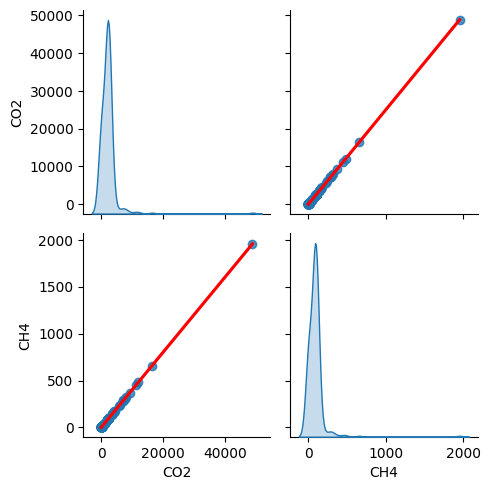

In [ ]:
combined_df = pd.concat([train_dataset_co2["CO2"], train_dataset_ch4["CH4"]], axis=1)
combined_df.columns = ["CO2", "CH4"]

# Crea un pairplot con las columnas combinadas
sns.pairplot(
   combined_df, kind='reg', diag_kind='kde', plot_kws={'line_kws': {'color': 'red'}}
)
plt.tight_layout()
plt.show()

##Explicación del Modelo de Red Neuronal
Es un modelo de Red Neuronal Secuencial, donde el flujo de datos va uno tras otro en las capas, son 2 capas densas con el optimizador Adams que hara los ajuste en cada iteración para poder llegar al objetivo.


In [ ]:
# creamos una capa densa para conectar los datos de entrada con los de salida
capa1 = tf.keras.layers.Dense(units = 1, input_shape=[1])
# Creamos la segunda capa densa
capa2 = tf.keras.layers.Dense(units=1)
# Creamos un modelo sequencial para este caso
# Utilizamos una función de pérdida de error cuadrático medio
# Usamos el optimizador de Adamax para que el modelo mejore en lugar de empeorar conforme se entrena
modelo = tf.keras.Sequential([capa1, capa2])
modelo.compile(
  optimizer=tf.keras.optimizers.Adamax(0.1),
  loss="mean_squared_error",
   metrics=['mae']
)



In [ ]:
modelo.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

# Entrenamos el modelo. Le decimos a la función fit que lo haga 1000 veces con epoch.
historico = modelo.fit(train_dataset_ch4, train_dataset_co2, epochs=1000, verbose=False)

##Comportamiento del Entrenamiento
Observamos que en cada iteración Epoch se va reduciedo la magnitud de pérdida.

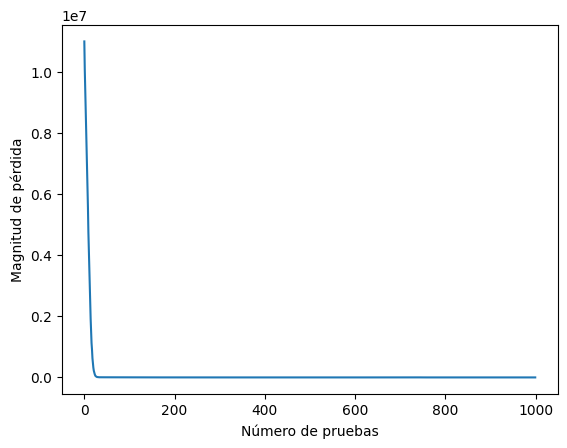

In [ ]:
plt.xlabel("Número de pruebas")
plt.ylabel("Magnitud de pérdida")
plt.plot(historico.history["loss"])
plt.show()

##Evaluación de la Red Neuronal
Testeamos el modelo de predicciones con los valores del dataset que no se usaron en el entrenamiento, por lo que es desconocido para la red.
Encontramos que las predicciones fueran casi perfectas, mayoria de los puntos estan en la línea diagonal. La dispersión alrededor de la línea indica la discrepancia entre las predicciones y los valores reales.

3/3 [==============================] - 0s 3ms/step


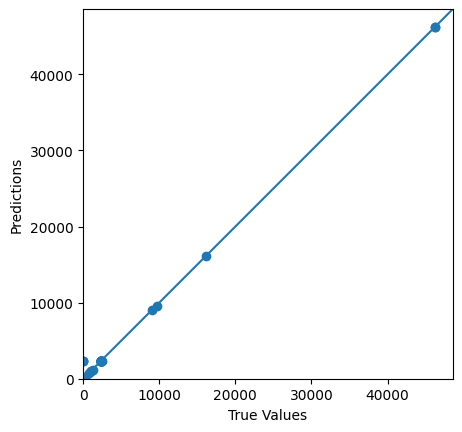

In [ ]:
test_predictions = modelo.predict(test_dataset_ch4).flatten()
plt.scatter(test_dataset_co2, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100000, 100000], [-100000, 100000])

## Implementación de la Red Neuronal
Una vez entrenado el modelo y evaluado se puede hacer uso de sus predicciones.

In [ ]:
print("Si hay una emision de GG (giga gramos) CH4 de 1985.6 la emisión de  GG CO2 sera de", modelo.predict([1985.6]), "GG")


1/1 [==============================] - 0s 67ms/step
Si hay una emision de GG (giga gramos) CH4 de 1985.6 la emisión de  GG CO2 sera de [[49534.22]] GG


# 7. Selección de Modelo

##Regresión Lineal

En el desarrollo del proyecto, se optó por utilizar la regresión lineal como modelo de predicción, debido a su simplicidad inherente y a que es un modelo fácil de comprender e interpretar.


La relación entre las variables de predicción y la variable de respuesta se representa como una línea recta, esto supone una visualización intuitiva del cambio de la variable de respuesta en función de las variaciones en las variables predictoras.


Sobremanera, la regresión lineal ofrece es ventajosa en términos de interpretación de los resultados. Los coeficientes obtenidos en el análisis se interpretan directa y significativamente. Esta claridad facilita la toma de decisiones basada en el modelo y brinda un entendimiento profundo de la relación entre las variables.




Este modelo es capaz de manejar grandes conjuntos de datos de manera rápida y eficiente, como es el caso del presente data set. La estructura matemática simple de la regresión lineal contribuye a una carga computacional reducida y un análisis ágil y sin complicaciones, permitiendo un procesamiento eficiente de la información.

A su vez, se utilizó el Mean Squared Error (MSE) como métrica para evaluar el rendimiento del modelo de regresión lineal, permite saber que tan diferente es el valor predicho y el valor real u observado. De igual manera, el MSE es de fácil interpretación. Proporciona un indicador intuitivo al representar el promedio de los cuadrados de las diferencias entre los valores predichos por el modelo y los valores reales observados en los datos. Por lo que da una idea de la calidad del modelo.

In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Regresión lineal y MSE para predicción de las emisiones de consumo de combustible líquido

<Axes: xlabel='date_year', ylabel='emisiones_liquid_fuel_consumption_kt'>

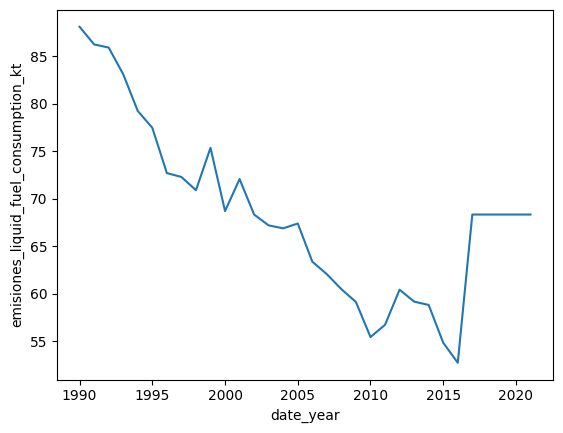

In [ ]:
# Cargar data frame
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vR1H3MZcR6m6Ua_MjSGqizm5ZubX5chLSwiGDjwICaCpZJDeeqdjFbS-EfCDjIjbnCYF9U2b6aF0Tnq/pub?gid=1974526046&single=true&output=csv")
# Seleccionar un tipo de emision: "CO2 emissions from liquid fuel consumption (kt)"
df_interes = df.query('`country` == "Mexico"').query('`variable` == "CO2 emissions from liquid fuel consumption (% of total)"')
# Seleccionar el nombre de las columnas de los años de registro
list_years = df_interes.columns.tolist()[4:]
# Crear un dataframe que tenga una columna del año de registro y el valor en ese año
df_mex = pd.melt(
    # Seleccionar conjunto de datos
    frame= df_interes,
    # Elegir que valores se van a quedar quietos
    id_vars = ['country'],
    # Elegir columnas que pasaran de ser columnas a filas
    value_vars = list_years,
    # Nombre de la columna donde estará los nombres de la lista de años
    var_name = "date_year",
    # Nombre de la columna donde estarán los valores de las emisiones de CO2
    value_name= "emisiones_liquid_fuel_consumption_kt"
    )
# convertir la columna a num entero
df_mex['date_year'] = df_mex['date_year'].apply(lambda x: re.sub(r'\[.*\]', '', x)).astype(int)
# Convertir a número los valores de "emisiones_liquid_fuel_consumption_kt"
df_mex['emisiones_liquid_fuel_consumption_kt'] = pd.to_numeric(df_mex['emisiones_liquid_fuel_consumption_kt'], errors='coerce')
# Visualización
sns.lineplot(data = df_mex, x = 'date_year', y = 'emisiones_liquid_fuel_consumption_kt')

In [ ]:
df_mex.head(5)

,country,date_year,emisiones_liquid_fuel_consumption_kt
0,Mexico,1990,88.10
1,Mexico,1991,86.24
2,Mexico,1992,85.91
3,Mexico,1993,83.10
4,Mexico,1994,79.23


In [ ]:
# Definir (X) y la variable objetivo (y)
X = df_mex['date_year'].values.reshape(-1, 1)  # Ajustar el formato de los datos para sklearn
y = df_mex['emisiones_liquid_fuel_consumption_kt'].values

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Modelo de regresión lineal
lr = LinearRegression()

# Entrenar con los datos de entrenamiento
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicciones para el conjunto de prueba
y_pred = lr.predict(X_test)

In [ ]:
#Evaluacion con Error medio cuadrado, mean square error (MSE)
MSE = mean_squared_error(y_test, y_pred)
print("MSE:", MSE)

MSE: 52.63320309093085


In [ ]:
#Predicción
# Años futuros para hacer predicciones
años_futuros = np.array([2022, 2023, 2024]).reshape(-1, 1)

# Predicciones para los años futuros
predicciones_futuras = lr.predict(años_futuros)
print("Predicciones para los años futuros:", predicciones_futuras)

Predicciones para los años futuros: [53.28397575 52.40518741 51.52639906]


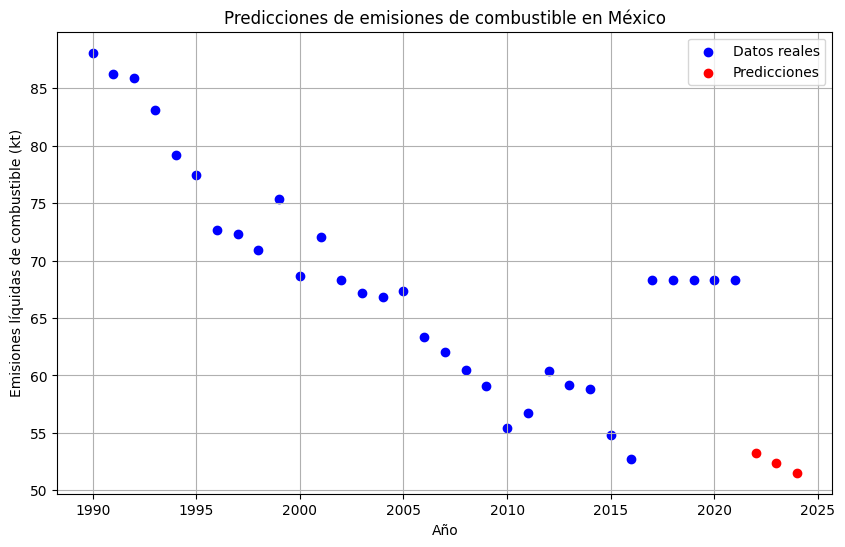

In [ ]:
# Visualizar los datos y las predicciones
# Crear un DataFrame con los años futuros y las predicciones
data = {
    'Año': [2022, 2023, 2024],
    'Predicción': predicciones_futuras
}
df_predicciones = pd.DataFrame(data)
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_mex['date_year'], df_mex['emisiones_liquid_fuel_consumption_kt'], label='Datos reales', color='blue')
plt.scatter(df_predicciones['Año'], df_predicciones['Predicción'], label='Predicciones', color='red')
plt.xlabel('Año')
plt.ylabel('Emisiones líquidas de combustible (kt)')
plt.title('Predicciones de emisiones de combustible en México')
plt.legend()
plt.grid(True)
plt.show()

Regresión lineal y MSE para predicción del total de emisiones de gases de efecto invernadero

<Axes: xlabel='date_year', ylabel='Total greenhouse gas emissions (kt of CO2 equivalent)'>

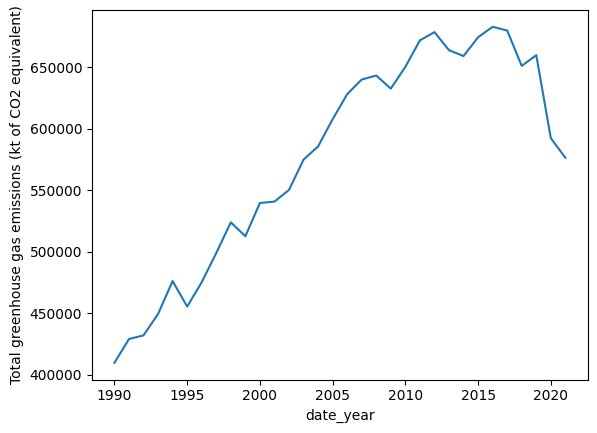

In [ ]:
# # Seleccionar un tipo de emision: "Total greenhouse gas emissions (kt of CO2 equivalent)"
df_interes2 = df.query('`country` == "Mexico"').query('`variable` == "Total greenhouse gas emissions (kt of CO2 equivalent)"')
# Seleccionar el nombre de las columnas de los años de registro
list_years = df_interes2.columns.tolist()[4:]
# Crear un dataframe que tenga una columna del año y valor
df_mex2 = pd.melt(
    # Seleccionar conjunto de datos
    frame= df_interes2,
    # Elegir que valores se van a quedar quietos
    id_vars = ['country'],
    # Elegir columnas que pasaran de ser columnas a filas
    value_vars = list_years,
    # Nombre de la columna donde estará los nombres de la lista de años
    var_name = "date_year",
    # Nombre de la columna donde estarán los valores de las emisiones de CO2
    value_name= "Total greenhouse gas emissions (kt of CO2 equivalent)"
    )
# convertir la columna a num entero
df_mex2['date_year'] = df_mex2['date_year'].apply(lambda x: re.sub(r'\[.*\]', '', x)).astype(int)
# Convertir a número los valores de "Total greenhouse gas emissions (kt of CO2 equivalent)"
df_mex2['Total greenhouse gas emissions (kt of CO2 equivalent)'] = pd.to_numeric(df_mex2['Total greenhouse gas emissions (kt of CO2 equivalent)'], errors='coerce')
# Visualización
sns.lineplot(data = df_mex2, x = 'date_year', y = 'Total greenhouse gas emissions (kt of CO2 equivalent)')

In [ ]:
df_mex2.head(5)

,country,date_year,Total greenhouse gas emissions (kt of CO2 equivalent)
0,Mexico,1990,409784.54
1,Mexico,1991,429088.34
2,Mexico,1992,432074.18
3,Mexico,1993,449487.97
4,Mexico,1994,476196.88


In [ ]:
# Separar las características (X) y la variable objetivo (y)
X = df_mex2['date_year'].values.reshape(-1, 1)  # Ajustar el formato de los datos para sklearn
y = df_mex2['Total greenhouse gas emissions (kt of CO2 equivalent)'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Crear el modelo de regresión lineal
lr = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicciones para el conjunto de prueba
y_pred = lr.predict(X_test)

In [ ]:
#Evaluacion con Error medio cuadrado, mean square error (MSE)
MSE = mean_squared_error(y_test, y_pred)
print("MSE:", MSE)

MSE: 2717313944.7221684


In [ ]:
# Años futuros para hacer predicciones
años_futuros = np.array([2022, 2023, 2024]).reshape(-1, 1)

# Predicciones para los años futuros
predicciones_futuras = lr.predict(años_futuros)
print("Predicciones para los años futuros:", predicciones_futuras)

Predicciones para los años futuros: [727416.65575397 736444.09582863 745471.53590328]


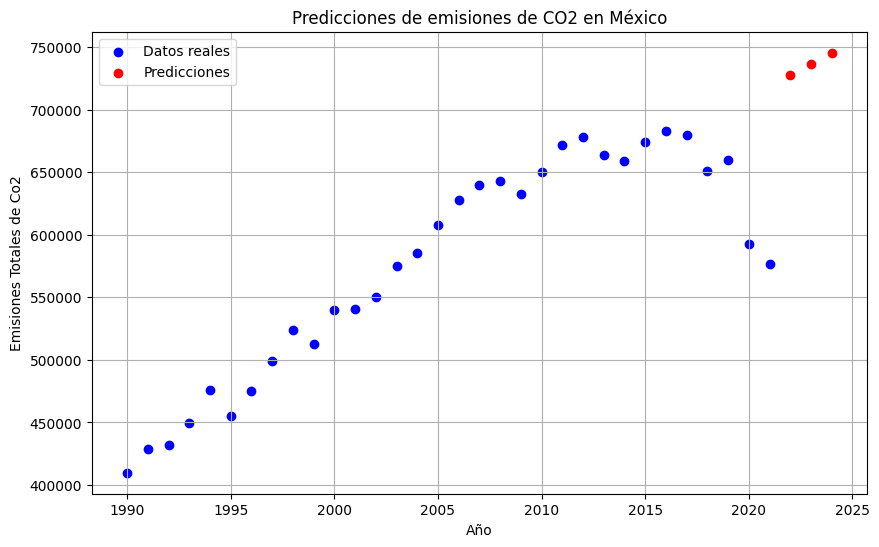

In [ ]:
# Visualizar los datos y las predicciones
# Crear un DataFrame con los años futuros y las predicciones
data = {
    'Año': [2022, 2023, 2024],
    'Predicción': predicciones_futuras
}
df_predicciones = pd.DataFrame(data)
# Tramar el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_mex2['date_year'], df_mex2['Total greenhouse gas emissions (kt of CO2 equivalent)'], label='Datos reales', color='blue')
plt.scatter(df_predicciones['Año'], df_predicciones['Predicción'], label='Predicciones', color='red')
plt.xlabel('Año')
plt.ylabel('Emisiones Totales de Co2')
plt.title('Predicciones de emisiones de CO2 en México')
plt.legend()
plt.grid(True)
plt.show()

# Árbol de desición

In [ ]:
# Preprocesado y modelado

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('once')

In [ ]:
df_arbol = pd.DataFrame(filtered_df)
df_arbol['promedio'] = df.loc[:, '1990':'2021'].apply(lambda row: row[row != 0].mean(), axis=1)
df_arbol.loc[:, '1990':'2021'] = df_arbol.loc[:, '1990':'2021'].apply(lambda row: row.replace(0, row[row != 0].mean()), axis=1)
df_arbol = df_arbol.drop(columns= ['country', 'code_country', 'variable','promedio'])
df_arbol_t = df_arbol.transpose()
df_arbol_t

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


,1780,1782,1783,1784,1785,1786,1787,1788,1789,1791
code_var,EN.ATM.CO2E.KT,EN.CO2.ETOT.ZS,EN.ATM.CO2E.GF.ZS,EN.ATM.CO2E.LF.ZS,EN.CO2.MANF.ZS,EN.CO2.OTHX.ZS,EN.CO2.BLDG.ZS,EN.ATM.CO2E.SF.ZS,EN.CO2.TRAN.ZS,EN.ATM.GHGT.KT.CE
1990,269575.4,36.68,19.79,88.1,20.73,2.0,8.09,5.94,32.5,409784.54
1991,287995.8,38.74,19.33,86.24,18.92,1.93,7.92,5.43,32.5,429088.34
1992,291682.5,38.69,19.21,85.91,18.61,1.93,8.51,5.11,32.26,432074.18
1993,300667.5,39.98,18.32,83.1,17.52,1.88,8.49,6.06,32.13,449487.97
1994,326504.8,42.17,17.47,79.23,16.46,1.64,8.23,6.22,31.5,476196.88
1995,306842.1,41.84,18.59,77.46,16.93,1.8,8.74,7.27,30.69,455462.27
1996,322699.1,41.77,19.26,72.69,18.0,1.85,8.28,7.73,30.1,475266.31
1997,342478.4,43.8,18.85,72.28,17.01,1.86,7.69,7.33,29.63,498988.95
1998,365142.4,45.97,19.07,70.89,16.32,1.74,7.5,7.05,28.47,523900.11


In [ ]:
nombres_nuevos = df_arbol_t.iloc[0]
df_arbol_t2 = df_arbol_t.rename(columns=nombres_nuevos)
df_arbol_t2 = df_arbol_t2.drop(df_arbol_t2.index[0])
df_arbol_t2

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


,EN.ATM.CO2E.KT,EN.CO2.ETOT.ZS,EN.ATM.CO2E.GF.ZS,EN.ATM.CO2E.LF.ZS,EN.CO2.MANF.ZS,EN.CO2.OTHX.ZS,EN.CO2.BLDG.ZS,EN.ATM.CO2E.SF.ZS,EN.CO2.TRAN.ZS,EN.ATM.GHGT.KT.CE
1990,269575.4,36.68,19.79,88.1,20.73,2.0,8.09,5.94,32.5,409784.54
1991,287995.8,38.74,19.33,86.24,18.92,1.93,7.92,5.43,32.5,429088.34
1992,291682.5,38.69,19.21,85.91,18.61,1.93,8.51,5.11,32.26,432074.18
1993,300667.5,39.98,18.32,83.1,17.52,1.88,8.49,6.06,32.13,449487.97
1994,326504.8,42.17,17.47,79.23,16.46,1.64,8.23,6.22,31.5,476196.88
1995,306842.1,41.84,18.59,77.46,16.93,1.8,8.74,7.27,30.69,455462.27
1996,322699.1,41.77,19.26,72.69,18.0,1.85,8.28,7.73,30.1,475266.31
1997,342478.4,43.8,18.85,72.28,17.01,1.86,7.69,7.33,29.63,498988.95
1998,365142.4,45.97,19.07,70.89,16.32,1.74,7.5,7.05,28.47,523900.11
1999,355178.3,45.47,19.38,75.35,15.44,1.97,7.03,7.22,30.1,512595.16


In [ ]:
# Definición de variables
#Predictores (x): Las columnas que representan las emisiones por industria.
#Variable respuesta (y): La columna que representa el total de emisiones.

x = df_arbol_t2.drop("EN.ATM.GHGT.KT.CE", axis=1)
y = df_arbol_t2["EN.ATM.GHGT.KT.CE"]

In [ ]:
# División de los datos en train y test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,
                                                    random_state=42)
# Creación del modelo
modelo_dt = DecisionTreeRegressor(max_depth = 3,)

# Entrenamiento del modelo

modelo_dt.fit(x_train, y_train)

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


DecisionTreeRegressor(max_depth=3)

In [ ]:
y_pred_dt = modelo_dt.predict(x_test)

Profundidad del árbol: 3
Número de nodos terminales: 8


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:241: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha = float(alpha)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportH

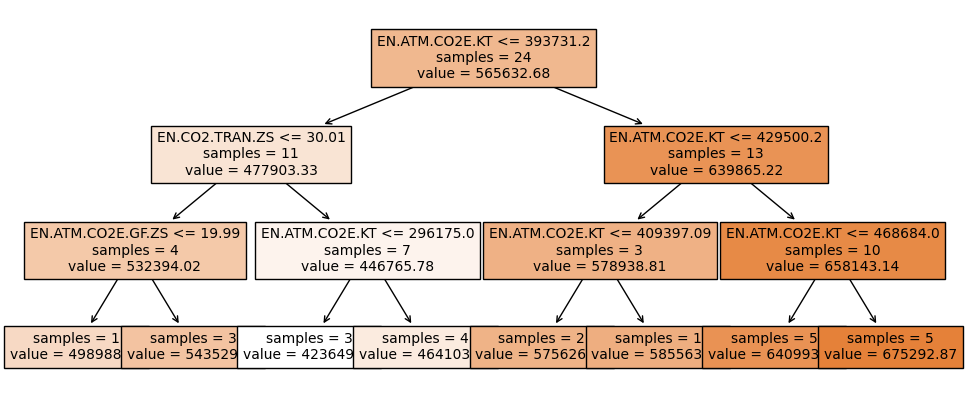

In [ ]:
# Estructura del árbol creado

fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {modelo_dt.get_depth()}")
print(f"Número de nodos terminales: {modelo_dt.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo_dt,
            feature_names = df_arbol_t2.drop(columns = "EN.ATM.GHGT.KT.CE").columns,
            class_names   = 'EN.ATM.GHGT.KT.CE',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [ ]:
texto_modelo = export_text(
                    decision_tree = modelo_dt,
                    feature_names = list(df_arbol_t2.drop(columns = "EN.ATM.GHGT.KT.CE").columns)
               )
print(texto_modelo)

|--- EN.ATM.CO2E.KT <= 393731.20
|   |--- EN.CO2.TRAN.ZS <= 30.01
|   |   |--- EN.ATM.CO2E.GF.ZS <= 19.99
|   |   |   |--- value: [498988.95]
|   |   |--- EN.ATM.CO2E.GF.ZS >  19.99
|   |   |   |--- value: [543529.05]
|   |--- EN.CO2.TRAN.ZS >  30.01
|   |   |--- EN.ATM.CO2E.KT <= 296175.00
|   |   |   |--- value: [423649.02]
|   |   |--- EN.ATM.CO2E.KT >  296175.00
|   |   |   |--- value: [464103.36]
|--- EN.ATM.CO2E.KT >  393731.20
|   |--- EN.ATM.CO2E.KT <= 429500.20
|   |   |--- EN.ATM.CO2E.KT <= 409397.09
|   |   |   |--- value: [575626.25]
|   |   |--- EN.ATM.CO2E.KT >  409397.09
|   |   |   |--- value: [585563.94]
|   |--- EN.ATM.CO2E.KT >  429500.20
|   |   |--- EN.ATM.CO2E.KT <= 468684.00
|   |   |   |--- value: [640993.41]
|   |   |--- EN.ATM.CO2E.KT >  468684.00
|   |   |   |--- value: [675292.87]



In [ ]:
importancia_predictores = pd.DataFrame(
                            {'predictor': df_arbol_t2.drop(columns = "EN.ATM.GHGT.KT.CE").columns,
                             'importancia': modelo_dt.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,EN.ATM.CO2E.KT,0.897571
8,EN.CO2.TRAN.ZS,0.094866
2,EN.ATM.CO2E.GF.ZS,0.007563
1,EN.CO2.ETOT.ZS,0.000000
3,EN.ATM.CO2E.LF.ZS,0.000000
4,EN.CO2.MANF.ZS,0.000000
5,EN.CO2.OTHX.ZS,0.000000
6,EN.CO2.BLDG.ZS,0.000000
7,EN.ATM.CO2E.SF.ZS,0.000000


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:792: MatplotlibDeprecationWarning: The legendHandles attrib

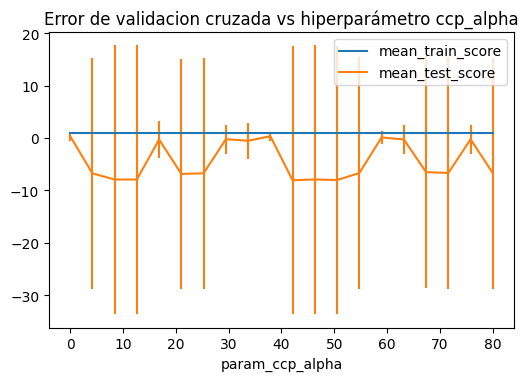

In [ ]:
# Pruning (const complexity pruning) por validación cruzada

# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 80, 20)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeRegressor(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1
                       ),
        param_grid = param_grid,
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(x_train, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [ ]:
grid.best_params_

{'ccp_alpha': 0.0}

Profundidad del árbol: 6
Número de nodos terminales: 24


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:241: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha = float(alpha)


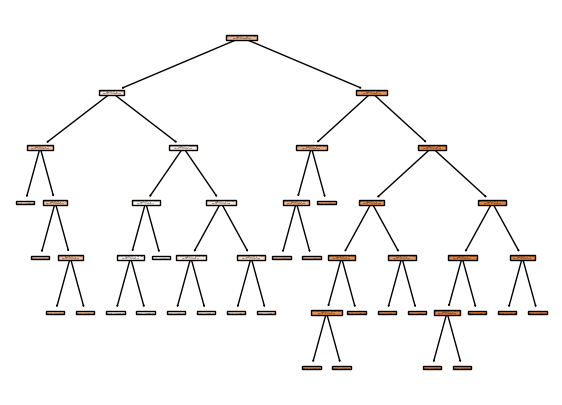

In [ ]:
# Estructura del árbol final

modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

fig, ax = plt.subplots(figsize=(7, 5))
plot = plot_tree(
            decision_tree = modelo_final,
            feature_names = df_arbol_t2.drop(columns = "EN.ATM.GHGT.KT.CE").columns,
            class_names   = 'EN.ATM.GHGT.KT.CE',
            filled        = True,
            impurity      = False,
            ax            = ax
       )

In [ ]:
# Error de test del modelo inicial

predicciones = modelo_dt.predict(X = x_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 51477.34456132181


In [ ]:
# Error de test del modelo final (tras aplicar pruning)

predicciones = modelo_final.predict(X = x_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 37188.67569530527


#Sistema de procesamiento de imágenes con ML



Para esta sección debemos dejar claro que seleccionamos el país México y por eso usaremos un mapa de la Republica Mexicana, tenemos la imagen llamada Mapa a la que haremos referencia.

Debemos aclarar lo siguiente antes de empezar, nuestra primer imagen va a salir azul debido a que  cv2 importa la imagen con los canales BGR (Blue, green, red)

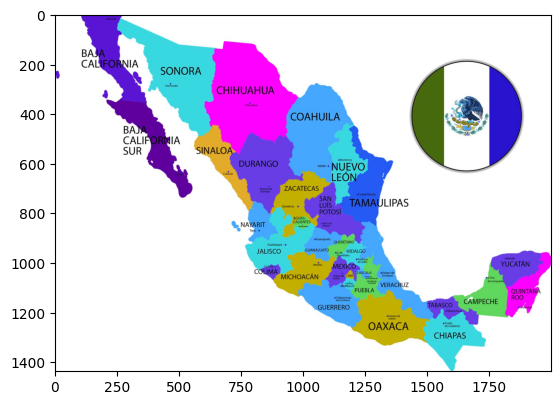

In [ ]:
from os import path
import cv2
import matplotlib.pyplot as plt
path = "/content/sample_data/Mapa.jpg"
img= cv2.imread(path)
plt.imshow(img)

Por lo tanto tenemos que hacer unas modificaciones para que podamos visualizar la escala RGB, como se muestra a continuación:

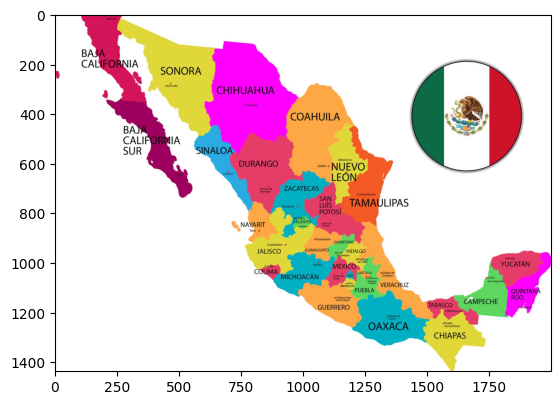

In [ ]:
import cv2
import matplotlib.pyplot as plt
"/content/sample_data/Mapa.jpg"
img = cv2.imread(path)
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)

**Aplicando escala de grises**

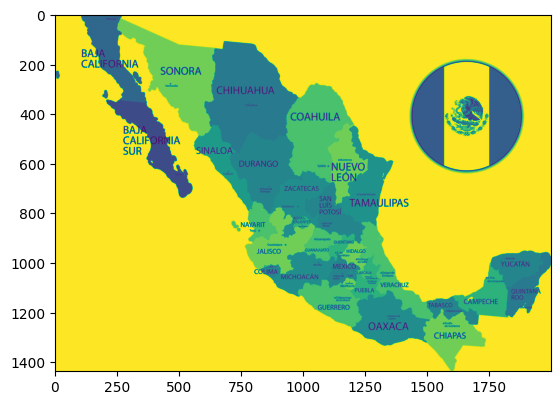

In [ ]:
import cv2
import matplotlib.pyplot as plt
"/content/sample_data/Mapa.jpg"
img = cv2.imread(path)
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(im_rgb)

**Usando el espacio de color HSV**

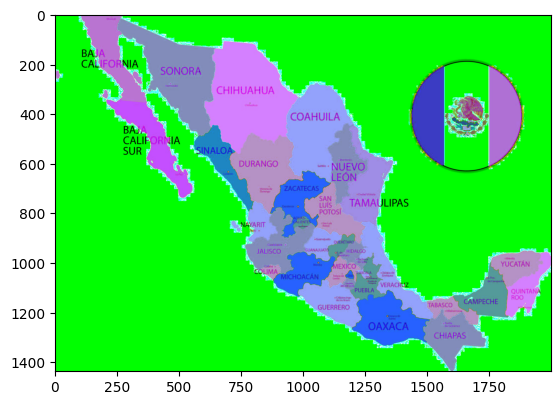

In [ ]:
import cv2
import matplotlib.pyplot as plt
"/content/sample_data/Mapa.jpg"
img = cv2.imread(path)
im_rgb = cv2.cvtColor(img, cv2.COLOR_RGB2HLS_FULL)
plt.imshow(im_rgb)
